In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

### Introduction About the Data :

**The dataset** The goal is to predict `price` of given diamond (Regression Analysis).

There are 10 independent variables (including `id`):

* `id` : unique identifier of each diamond
* `carat` : Carat (ct.) refers to the unique unit of weight measurement used exclusively to weigh gemstones and diamonds.
* `cut` : Quality of Diamond Cut
* `color` : Color of Diamond
* `clarity` : Diamond clarity is a measure of the purity and rarity of the stone, graded by the visibility of these characteristics under 10-power magnification.
* `depth` : The depth of diamond is its height (in millimeters) measured from the culet (bottom tip) to the table (flat, top surface)
* `table` : A diamond's table is the facet which can be seen when the stone is viewed face up.
* `x` : Diamond X dimension
* `y` : Diamond Y dimension
* `x` : Diamond Z dimension

Target variable:
* `price`: Price of the given Diamond.

Dataset Source Link :
[https://www.kaggle.com/competitions/playground-series-s3e8/data?select=train.csv](https://www.kaggle.com/competitions/playground-series-s3e8/data?select=train.csv)

In [3]:
df = pd.read_csv("C:\\Users\\DELL\\Downloads\\MLOps-Practice\\MLOps-end-to-end-prac\\data\\train.csv")

In [4]:
df.head()

,id,carat,cut,color,clarity,depth,table,x,y,z,price
0,0,1.52,Premium,F,VS2,62.2,58.0,7.27,7.33,4.55,13619
1,1,2.03,Very Good,J,SI2,62.0,58.0,8.06,8.12,5.05,13387
2,2,0.70,Ideal,G,VS1,61.2,57.0,5.69,5.73,3.50,2772
3,3,0.32,Ideal,G,VS1,61.6,56.0,4.38,4.41,2.71,666
4,4,1.70,Premium,G,VS2,62.6,59.0,7.65,7.61,4.77,14453


In [5]:
df.shape

(193573, 11)

In [6]:
df.columns

Index(['id', 'carat', 'cut', 'color', 'clarity', 'depth', 'table', 'x', 'y',
       'z', 'price'],
      dtype='object')

In [7]:
df.isna().sum()

id         0
carat      0
cut        0
color      0
clarity    0
depth      0
table      0
x          0
y          0
z          0
price      0
dtype: int64

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193573 entries, 0 to 193572
Data columns (total 11 columns):
 #   Column   Non-Null Count   Dtype  
---  ------   --------------   -----  
 0   id       193573 non-null  int64  
 1   carat    193573 non-null  float64
 2   cut      193573 non-null  object 
 3   color    193573 non-null  object 
 4   clarity  193573 non-null  object 
 5   depth    193573 non-null  float64
 6   table    193573 non-null  float64
 7   x        193573 non-null  float64
 8   y        193573 non-null  float64
 9   z        193573 non-null  float64
 10  price    193573 non-null  int64  
dtypes: float64(6), int64(2), object(3)
memory usage: 16.2+ MB


In [9]:
df.drop("id",axis=1, inplace=True)

In [10]:
len(df.columns)

10

In [11]:
num_cols = [i for i in df.columns if df[i].dtype!="O"]
num_cols

['carat', 'depth', 'table', 'x', 'y', 'z', 'price']

In [12]:
cat_cols = [i for i in df.columns if i not in num_cols]
cat_cols

['cut', 'color', 'clarity']

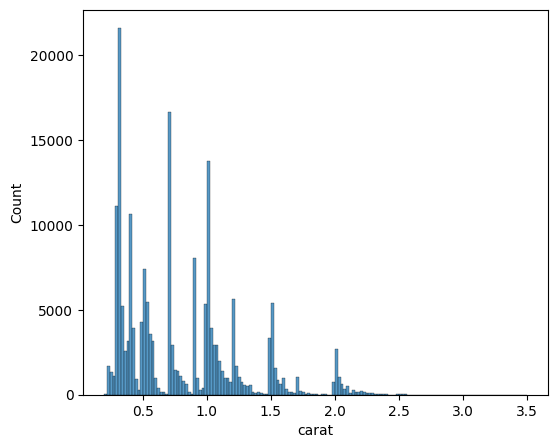

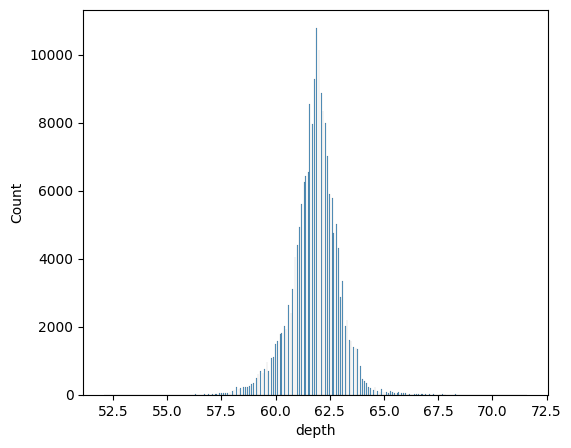

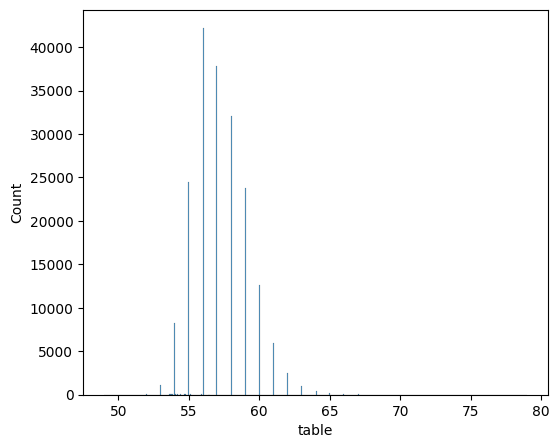

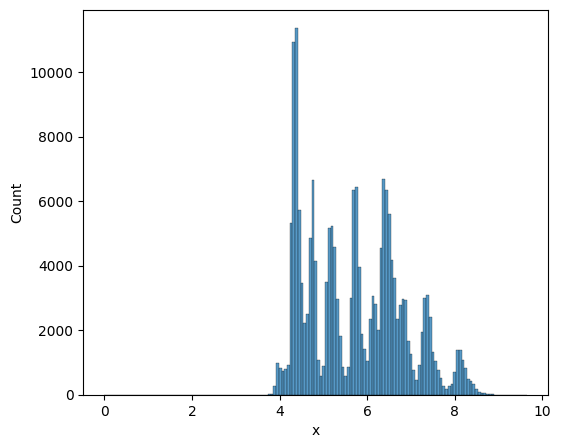

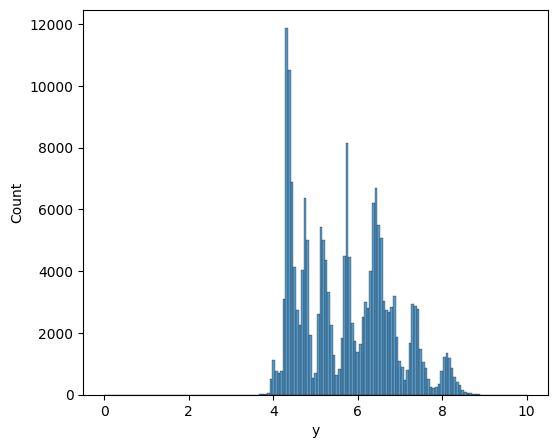

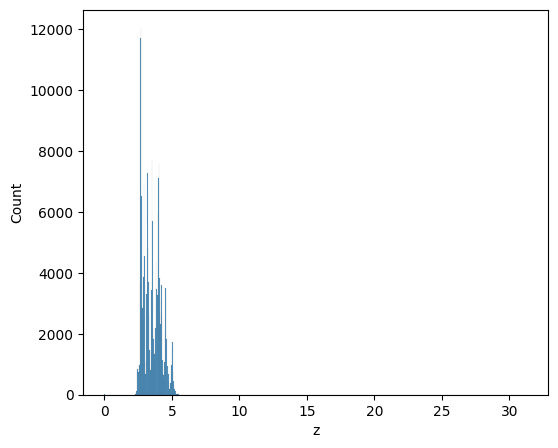

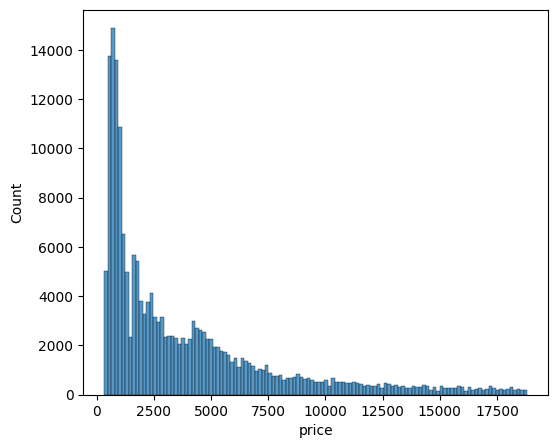

In [13]:
for i in num_cols:
    plt.figure(figsize=(6,5))
    sns.histplot(df[i])
    plt.show()

In [14]:
df.duplicated().sum()

np.int64(0)

In [15]:
num_cols

['carat', 'depth', 'table', 'x', 'y', 'z', 'price']

In [16]:
cat_cols

['cut', 'color', 'clarity']

In [17]:
print(len(df['cut'].unique()))
print(len(df['color'].unique()))
print(len(df['clarity'].unique()))


5
7
8


In [18]:
df["color"].value_counts()

color
G    44391
E    35869
F    34258
H    30799
D    24286
I    17514
J     6456
Name: count, dtype: int64

In [19]:
df["clarity"].value_counts()

clarity
SI1     53272
VS2     48027
VS1     30669
SI2     30484
VVS2    15762
VVS1    10628
IF       4219
I1        512
Name: count, dtype: int64

In [20]:
df["cut"].value_counts()

cut
Ideal        92454
Premium      49910
Very Good    37566
Good         11622
Fair          2021
Name: count, dtype: int64

## Ordinal encoding

In [21]:
cut_map = {"Fair":1, "Good":2, "Very Good":3, "Premium":4, "Ideal":5}
clarity_map = {"I1":1,"SI2":2 ,"SI1":3 ,"VS2":4 , "VS1":5 , "VVS2":6 , "VVS1":7 ,"IF":8}
color_map = {"D":1 ,"E":2 ,"F":3 , "G":4 ,"H":5 , "I":6, "J":7}

In [22]:
df["cut"] = df["cut"].map(cut_map)
df["clarity"] = df["clarity"].map(clarity_map)
df["color"] = df["color"].map(color_map)

In [23]:
df.head()

,carat,cut,color,clarity,depth,table,x,y,z,price
0,1.52,4,3,4,62.2,58.0,7.27,7.33,4.55,13619
1,2.03,3,7,2,62.0,58.0,8.06,8.12,5.05,13387
2,0.70,5,4,5,61.2,57.0,5.69,5.73,3.50,2772
3,0.32,5,4,5,61.6,56.0,4.38,4.41,2.71,666
4,1.70,4,4,4,62.6,59.0,7.65,7.61,4.77,14453


In [24]:
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import OrdinalEncoder

# Pipelines
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer

In [ ]:
# Splitting the data
X=df.drop(labels=["price"],axis=1)
y=df[["price"]]


In [26]:
categorical_cols=X.select_dtypes(include='object').columns
numerical_cols=X.select_dtypes(exclude='object').columns

In [27]:
X.head()

,carat,cut,color,clarity,depth,table,x,y,z
0,1.52,4,3,4,62.2,58.0,7.27,7.33,4.55
1,2.03,3,7,2,62.0,58.0,8.06,8.12,5.05
2,0.70,5,4,5,61.2,57.0,5.69,5.73,3.50
3,0.32,5,4,5,61.6,56.0,4.38,4.41,2.71
4,1.70,4,4,4,62.6,59.0,7.65,7.61,4.77


In [66]:
y.head()

,price
0,13619
1,13387
2,2772
3,666
4,14453


In [28]:
num_pipeline = Pipeline(
    steps=[
        ("imputer", SimpleImputer()),
        ("scaler", StandardScaler())
    ]
)

In [29]:
# Define the custom ranking for each ordinal variable
cut_categories = ['Fair', 'Good', 'Very Good','Premium','Ideal']
color_categories = ['D', 'E', 'F', 'G', 'H', 'I', 'J']
clarity_categories = ['I1','SI2','SI1','VS2','VS1','VVS2','VVS1','IF']

In [30]:
cat_pipeline = Pipeline(
    steps=[
        ("imputer", SimpleImputer(strategy="most_frequent")),
        ("orninalencoder", OrdinalEncoder(categories=[cut_categories, color_categories, clarity_categories]))
    ]
)

In [31]:
preprocessor = ColumnTransformer([
    ("num_pipeline", num_pipeline, numerical_cols),
    ("cat_pipeline", cat_pipeline, categorical_cols)
])

In [34]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2,random_state=43)

In [35]:
X_train.head()

,carat,cut,color,clarity,depth,table,x,y,z
116905,1.01,4,1,3,61.6,59.0,6.47,6.42,3.97
9667,0.71,3,2,5,60.1,60.0,5.74,5.81,3.47
38347,0.70,3,5,4,62.4,58.0,5.64,5.67,3.53
37574,2.03,4,5,2,62.2,59.0,8.09,8.06,5.01
174601,1.05,5,5,5,62.4,57.0,6.53,6.47,4.06


In [36]:
preprocessor.fit_transform(X_train)

array([[ 0.4742567 , -0.1313343 , -1.54941924, ...,  0.68045348,
         0.63521995,  0.63202925],
       [-0.17432111, -1.13643272, -0.93337981, ...,  0.02232814,
         0.08170545, -0.09320485],
       [-0.19594038, -1.13643272,  0.91473847, ..., -0.06782601,
        -0.04533066, -0.00617676],
       ...,
       [ 0.49587596,  0.87376413, -0.31734038, ...,  0.67143806,
         0.64429396,  0.66103861],
       [ 1.96598566,  0.87376413, -0.31734038, ...,  1.7352571 ,
         1.68780491,  1.69087102],
       [-0.84451819, -0.1313343 , -1.54941924, ..., -0.88822883,
        -0.93458347, -0.8474483 ]], shape=(154858, 9))

In [37]:
preprocessor.transform(X_test)


array([[-0.47699076,  0.87376413, -0.31734038, ..., -0.36533473,
        -0.33569893, -0.33978444],
       [-0.60670632,  0.87376413,  0.29869904, ..., -0.45548888,
        -0.49903108, -0.54284998],
       [-0.19594038, -1.13643272,  0.91473847, ..., -0.10388768,
        -0.09070071,  0.00832793],
       ...,
       [-1.01747227,  0.87376413,  0.91473847, ..., -1.14066047,
        -1.11606364, -1.18105598],
       [-0.19594038, -1.13643272,  0.29869904, ..., -0.0588106 ,
        -0.04533066,  0.00832793],
       [-0.19594038,  0.87376413,  0.29869904, ..., -0.01373352,
        -0.06347868, -0.02068144]], shape=(38715, 9))

In [39]:
preprocessor.get_feature_names_out()

array(['num_pipeline__carat', 'num_pipeline__cut', 'num_pipeline__color',
       'num_pipeline__clarity', 'num_pipeline__depth',
       'num_pipeline__table', 'num_pipeline__x', 'num_pipeline__y',
       'num_pipeline__z'], dtype=object)

In [40]:
X_train=pd.DataFrame(preprocessor.fit_transform(X_train),columns=preprocessor.get_feature_names_out())
X_test=pd.DataFrame(preprocessor.transform(X_test),columns=preprocessor.get_feature_names_out())

In [41]:
X_train


,num_pipeline__carat,num_pipeline__cut,num_pipeline__color,num_pipeline__clarity,num_pipeline__depth,num_pipeline__table,num_pipeline__x,num_pipeline__y,num_pipeline__z
0,0.474257,-0.131334,-1.549419,-0.649298,-0.204361,0.923932,0.680453,0.635220,0.632029
1,-0.174321,-1.136433,-0.933380,0.683051,-1.589742,1.445302,0.022328,0.081705,-0.093205
2,-0.195940,-1.136433,0.914738,0.016876,0.534508,0.402563,-0.067826,-0.045331,-0.006177
3,2.679421,-0.131334,0.914738,-1.315473,0.349791,0.923932,2.140951,2.123357,2.140516
4,0.560734,0.873764,0.914738,0.683051,0.534508,-0.118807,0.734546,0.680590,0.762571
...,...,...,...,...,...,...,...,...,...
154853,-1.039092,0.873764,0.298699,2.681574,-0.112003,-1.682915,-1.194753,-1.170508,-1.181056
154854,0.452637,-1.136433,-1.549419,-0.649298,-2.420970,2.488041,0.707500,0.762256,0.472478
154855,0.495876,0.873764,-0.317340,0.016876,0.165073,-0.118807,0.671438,0.644294,0.661039
154856,1.965986,0.873764,-0.317340,-1.315473,-0.112003,-0.118807,1.735257,1.687805,1.690871


In [42]:
X_test

,num_pipeline__carat,num_pipeline__cut,num_pipeline__color,num_pipeline__clarity,num_pipeline__depth,num_pipeline__table,num_pipeline__x,num_pipeline__y,num_pipeline__z
0,-0.476991,0.873764,-0.317340,1.349225,0.072715,-0.640176,-0.365335,-0.335699,-0.339784
1,-0.606706,0.873764,0.298699,2.015399,-0.850872,-0.640176,-0.455489,-0.499031,-0.542850
2,-0.195940,-1.136433,0.914738,-1.315473,1.273378,0.923932,-0.103888,-0.090701,0.008328
3,-1.060711,-0.131334,-0.933380,0.016876,-0.666155,1.445302,-1.248845,-1.243100,-1.282589
4,0.236445,-1.136433,-0.317340,-1.315473,-1.589742,0.923932,0.473099,0.517258,0.341936
...,...,...,...,...,...,...,...,...,...
38710,-0.606706,0.873764,0.298699,-0.649298,-0.112003,-1.161546,-0.500566,-0.517179,-0.513841
38711,2.809137,-0.131334,1.530778,-0.649298,-1.220307,0.402563,2.312244,2.277615,2.126011
38712,-1.017472,0.873764,0.914738,2.015399,-0.573796,-0.640176,-1.140660,-1.116064,-1.181056
38713,-0.195940,-1.136433,0.298699,0.683051,0.811584,0.402563,-0.058811,-0.045331,0.008328


In [55]:
"""linear regression
ridge regression
lasso regression
elastic net
XGBoostRegressor"""

'linear regression\nridge regression\nlasso regression\nelastic net\nXGBoostRegressor'

In [57]:
## Model Training
from xgboost import XGBRegressor
from sklearn.linear_model import LinearRegression,Lasso,Ridge,ElasticNet
from sklearn.metrics import r2_score,mean_absolute_error,mean_squared_error

In [45]:
import numpy as np
def evaluate_model(true, predicted):
    mae = mean_absolute_error(true, predicted)
    mse = mean_squared_error(true, predicted)
    rmse = np.sqrt(mean_squared_error(true, predicted))
    r2_square = r2_score(true, predicted)
    return mae, rmse, r2_square

In [58]:
## Train multiple models

models={
    'LinearRegression':LinearRegression(),
    'Lasso':Lasso(),
    'Ridge':Ridge(),
    'Elasticnet':ElasticNet(),
    'XGBRegressor':XGBRegressor()
}

In [59]:
trained_model_list=[]
model_list=[]
r2_list=[]

In [60]:
list(models)

['LinearRegression', 'Lasso', 'Ridge', 'Elasticnet', 'XGBRegressor']

In [61]:
for i in range(len(list(models))):
    model=list(models.values())[i]
    print(model)

LinearRegression()
Lasso()
Ridge()
ElasticNet()
XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)


In [62]:
models.keys()

dict_keys(['LinearRegression', 'Lasso', 'Ridge', 'Elasticnet', 'XGBRegressor'])

In [63]:
models.values()

dict_values([LinearRegression(), Lasso(), Ridge(), ElasticNet(), XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, device=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             multi_strategy=None, n_estimators=None, n_jobs=None,
             num_parallel_tree=None, random_state=None, ...)])

In [64]:
for i in range(len(list(models))):
    model=list(models.values())[i]
    model.fit(X_train,y_train)

    #Make Predictions
    y_pred=model.predict(X_test)

    #this is a validation(test) score
    mae, rmse, r2_square=evaluate_model(y_test,y_pred)

    print(list(models.keys())[i])
    model_list.append(list(models.keys())[i])

    print('Model Training Performance')
    print("RMSE:",rmse)
    print("MAE:",mae)
    print("R2 score",r2_square*100)

    r2_list.append(r2_square)
    
    print('='*35)
    print('\n')


LinearRegression
Model Training Performance
RMSE: 1009.1879169765377
MAE: 674.5192815442904
R2 score 93.73135485149695


Lasso
Model Training Performance
RMSE: 1009.2813749438811
MAE: 675.7224859054141
R2 score 93.73019375562791


Ridge
Model Training Performance
RMSE: 1009.188281383479
MAE: 674.545038249095
R2 score 93.73135032441495


Elasticnet
Model Training Performance
RMSE: 1528.7834698853796
MAE: 1063.338243560679
R2 score 85.61461271231539


XGBRegressor
Model Training Performance
RMSE: 577.8249626833372
MAE: 299.5825500488281
R2 score 97.94495105743408




In [65]:
r2_list

[0.9373135485149694,
 0.9373019375562791,
 0.9373135032441495,
 0.8561461271231539,
 0.9794495105743408]

### **Conclusion:**  
Among all models, **XGBRegressor** performs the best with:  
✅ **Lowest RMSE (577.82)** → Least error in predictions.  
✅ **Lowest MAE (299.58)** → More accurate predictions.  
✅ **Highest R² (97.94%)** → Best model fit.  

While **Linear, Ridge, and Lasso Regression** have similar performance (~93.73% R²), **ElasticNet** performs the worst with an **R² of 85.61%** and **highest errors**.  